## Data Selection
[I. Analyze based on year](#year)

- [1. deep learning info summarize](#sum)

- [2. Number of days from last commit to today](#last) 
    
>Some created date is latter than last commit date

- [3. Medium distribution](#medium)

- [4. Get popular programming language from selected data](#language)

- [5. Compare selected data with orginal](#compare)

- [6. Relationship between variables](#analysis)



In [1]:
import requests
import time
import json
import pprint
import pickle
import pandas as pd
import base64
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [2]:
colnames = ['repo_name', 'description', 'created_at', 'pushed_at', 'forks_count', 'stargazers_count',
          'subscribers_count', 'open_issues_count', 'organization_name','topics','pulls_count', 'commits_count', 'branches_count',
           'releases_count', 'contributors_count', 'last_commit_time', 'readme', 'language']


In [456]:
# API
import pickle
import pandas as pd
data = []
with open('dl_info.pkl', 'rb') as fr:
    try:
        while True:
            data.append(pickle.load(fr))
    except EOFError:
        pass
dl_info = pd.DataFrame(data,columns=colnames)
dl_org = pd.DataFrame(data,columns=colnames)
# convert time to datetime
dl_info[["created_at", "pushed_at", "last_commit_time"]] = dl_info[["created_at", "pushed_at", "last_commit_time"]].apply(pd.to_datetime)
dl_org[["created_at", "pushed_at", "last_commit_time"]] = dl_org[["created_at", "pushed_at", "last_commit_time"]].apply(pd.to_datetime)


# Biag Query Data
dl_bq_all = pd.read_csv('dl_bq_all.csv', sep = '\t')
del dl_bq_all['Unnamed: 0']
dl_bq_all.tail(3)

# inner join
inner_join_csv = pd.merge(dl_info, dl_bq_all, on = 'repo_name', how = 'inner')

In [4]:
dl_info.iloc[:, [4, 5, 6, 7, 10, 11, 12,13, 14]].describe()


,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count
count,56995.000000,56995.000000,56995.000000,56995.000000,56995.000000,56995.000000,56995.000000,56995.000000,56995.000000
mean,5.514607,17.581595,2.206527,0.555347,0.084007,52.634863,1.331275,0.082183,1.775191
std,138.553284,463.952356,30.794091,19.881706,2.738782,2039.432024,8.456814,1.740333,15.258040
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000
max,17145.000000,57182.000000,2434.000000,3094.000000,542.000000,461470.000000,1479.000000,279.000000,2626.000000


In [5]:
# covert column to date time
def year(df):
#     df[["created_at", "pushed_at", "last_commit_time"]] = df[["created_at", "pushed_at", "last_commit_time"]].apply(pd.to_datetime)

    # see which year has more people pushed deep learning repo
    push_year = df['pushed_at'].dt.year
    last_commit_time = df['last_commit_time'].dt.year
    created_at = df['created_at'].dt.year
    plt.hist([created_at, push_year, last_commit_time], color=['g','r','b'], alpha=1, label = ('created at','pushed year', 'last commit time'))
    plt.xlabel('year') 
    plt.ylabel('frequency')
    plt.legend()

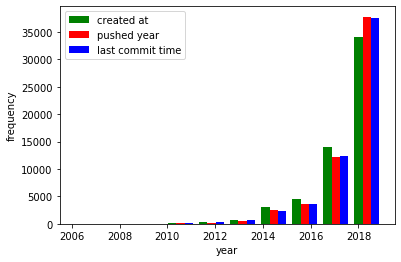

In [6]:
# API year distribution
year(dl_info)

## <a name=year></a>Analysis based on year


In [86]:
# get number of days from now to last commit 
from datetime import date
dl_info['now-last_commit'] = date.today() - dl_info['last_commit_time'].dt.date
dl_info['now-last_commit'] = [dl_info['now-last_commit'][i].days for i in range(len(dl_info))]
# one repo has wrong last commit-date

#  get commit frequency (last_commit - now / commit_num)
dl_info['active_day'] = dl_info['last_commit_time'].dt.date - dl_info['created_at'].dt.date
dl_info['active_day'] = [dl_info['active_day'][i].days +1  for i in range(len(dl_info))]
dl_info['active_day'] = abs(dl_info['active_day'])
dl_info['commit_freq'] = dl_info['active_day'] / dl_info['commits_count']
dl_info.head()

# delete repo that language is None
index_list = [i for i in dl_info[dl_info['language'] == ''].index]
dl_info.drop(index = index_list, inplace = True)


dl_info.drop(index = dl_info[dl_info['now-last_commit']<0].index[0], inplace = True)

In [334]:
# divide df based on creation_year
dl_2008 = dl_info[dl_info['created_at'].dt.year == 2008]
dl_2009 = dl_info[dl_info['created_at'].dt.year == 2009]
dl_2010 = dl_info[dl_info['created_at'].dt.year == 2010]
dl_2011 = dl_info[dl_info['created_at'].dt.year == 2011]
dl_2012 = dl_info[dl_info['created_at'].dt.year == 2012]
dl_2013 = dl_info[dl_info['created_at'].dt.year == 2013]
dl_2014 = dl_info[dl_info['created_at'].dt.year == 2014]
dl_2015 = dl_info[dl_info['created_at'].dt.year == 2015]
dl_2016 = dl_info[dl_info['created_at'].dt.year == 2016]
dl_2017 = dl_info[dl_info['created_at'].dt.year == 2017]
dl_2018 = dl_info[dl_info['created_at'].dt.year == 2018]
dl_2019 = dl_info[dl_info['created_at'].dt.year == 2019]




In [335]:
def count_graph(df):
    sns.set(style="darkgrid")
    a_dims = (20, 28)
    fig, ((ax1, ax2), (ax3, ax4),
          (ax5, ax6), (ax7, ax8)) = plt.subplots(figsize=a_dims,
                                             ncols=2,
                                             nrows = 4, 
                                             sharey=True)


    # -- Graph
    sns.set(style="darkgrid")
    a1 = sns.countplot(x= "forks_count", data=df, color = 'blue', ax = ax1)
    a2 = sns.countplot(x= "stargazers_count", data=df, color = 'blue', ax = ax2)
    a3 = sns.countplot(x= "subscribers_count", data=df, color = 'blue',ax = ax3)
    a4 = sns.countplot(x= "open_issues_count", data=df, color = 'blue', ax = ax4)
    a5 = sns.countplot(x= "pulls_count", data=df, color = 'blue', ax = ax5)
    a6 = sns.countplot(x= "contributors_count", data=df, color = 'blue', ax = ax6)
    a7 = sns.countplot(x= "branches_count", data=df, color = 'blue', ax = ax7)
    a8 = sns.countplot(x= "releases_count", data=df, color = 'blue', ax = ax8)

    titles = ['Forks Frequency Count', 'Stargazers Frequency Count', 'Subscribers Frequency Count','Open Issue Frequency Count',
            'Pulls Count Frequency', 'Contributors Frequency Count', 'Branches Frequency Count','Releases Frequency Count']

    a = [a1, a2, a3, a4, a5, a6, a7, a8]

    # -- set title to each subplot
    for (ai, title) in zip(a,titles):

        ai.set_title(title, fontsize = 18, fontweight = 'bold')

def commit_graph(df):
    a4_dims = (20, 8)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.set(style="darkgrid")

    ax = sns.countplot(x= "commits_count", data=df, color = 'blue')
    ax.set_title('Commit Frequency Count', fontsize = 18, fontweight = 'bold')

### <a name=sum></a> deep learning github API info summarize

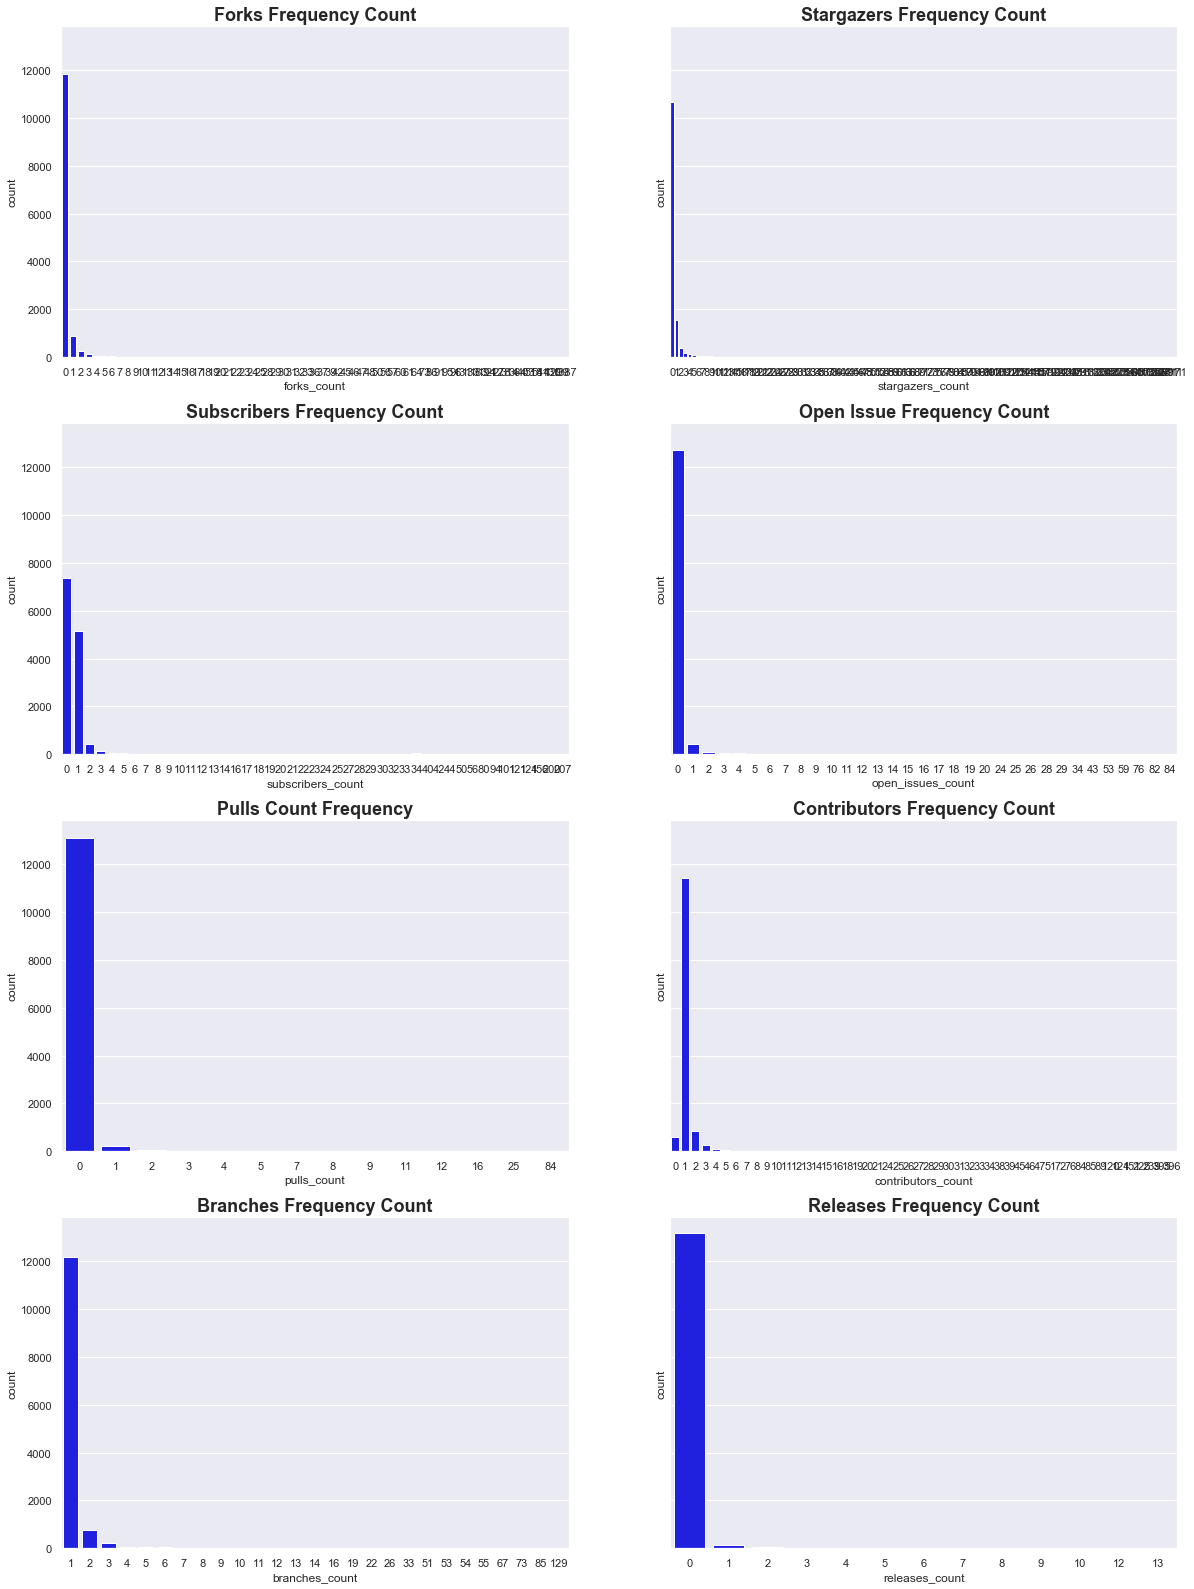

In [384]:
count_graph(dl_2019)

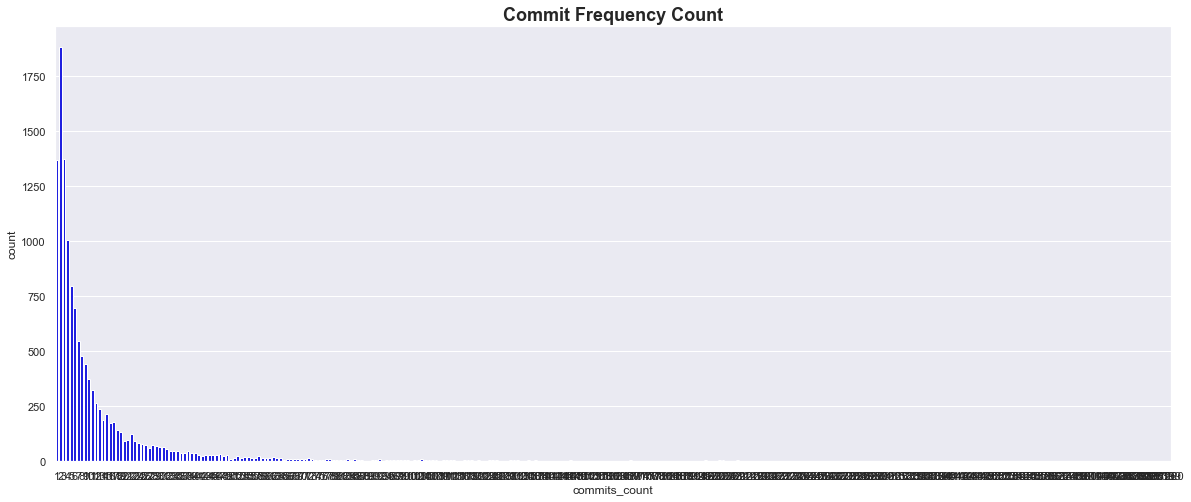

In [337]:
commit_graph(dl_2019)

## <a name=last></a>Number of days from last commit to today
**Why some created time is later than last commit time? 0.0055% for 2019**<br>
- Should we drop those values?

In [88]:
dl_2019[dl_2019['now-last_commit'] > 365]

,repo_name,description,created_at,pushed_at,forks_count,stargazers_count,subscribers_count,open_issues_count,organization_name,topics,...,commits_count,branches_count,releases_count,contributors_count,last_commit_time,readme,language,now-last_commit,active_day,commit_freq
99,bkuk69/deepLearningOpenLecture,None,2019-08-01 09:32:24+00:00,2019-08-01 09:33:16+00:00,0,0,1,0,None,None,...,92,1,0,1,2018-09-29 16:49:30+00:00,b'# ZBC - Deep Learning\n\n\xec\xb2\x98\xec\x9...,"Jupyter Notebook,Python,TeX,Batchfile,Shell",406,305,3.315217
803,marcomarasca/SDCND-Behavioral-Cloning,Teaching a car to drive with deep learning,2019-07-21 01:51:15+00:00,2019-07-21 02:06:46+00:00,0,0,1,0,None,"python,deep-learning,nvidia,behavioral-cloning...",...,50,1,0,9,2018-04-26 00:31:12+00:00,b'# End-to-End Deep Learning for Self Driving ...,Python,562,450,9.000000
1204,hadishamgholi/aparat_dl,simple aparat downloader,2019-05-14 22:31:31+00:00,2016-12-15 09:52:18+00:00,0,0,1,0,None,None,...,10,1,0,0,2016-12-15 09:52:18+00:00,b'simple aparat downloader\n====\n\n## usage:\...,Python,1059,879,87.900000
1490,hellopikaqiu/deep-learning-with-keras-notebooks,deep-learning-with-keras-notebooks-master,2019-03-22 06:06:31+00:00,2019-03-22 06:09:01+00:00,0,1,0,0,None,None,...,55,1,0,3,2018-03-10 05:26:22+00:00,b'# deep-learning-with-keras-notebooks\n\n\xe9...,Jupyter Notebook,609,376,6.836364
1553,kingafy/Coursera-Deep-learning,None,2019-02-22 07:54:55+00:00,2019-02-22 09:49:06+00:00,0,0,1,0,None,None,...,11,1,0,0,2018-04-21 14:33:15+00:00,"b'<p align=""center""><img width=""40%"" src=""logo...","Jupyter Notebook,Python",567,306,27.818182
1623,Joviistos/dlnlp,None,2019-01-12 12:31:04+00:00,2019-01-12 12:37:53+00:00,0,0,0,0,None,None,...,13,1,0,1,2018-03-20 04:57:09+00:00,b'# Facebook Messenger Bot\nThis is a simple p...,Python,599,297,22.846154
1738,dfint/fake_ttf.dll,None,2019-08-20 16:54:25+00:00,2019-08-20 16:56:35+00:00,0,0,1,0,dfint,proxy-dll,...,33,2,0,1,2015-05-08 10:09:11+00:00,None,"Assembly,Python,C++,PHP,Batchfile",1646,1564,47.393939
1876,league-level4-student/level4-codingexam-2-Dave...,level4-codingexam-2-DaveDLeague created by Git...,2019-02-21 01:37:57+00:00,2019-02-21 01:38:17+00:00,0,0,1,0,league-level4-student,None,...,1,1,0,0,2018-07-31 16:39:43+00:00,None,Java,466,204,204.000000
2254,MicKaranja/mathematical-foundations,Mathematical Foundations For Machine Learning ...,2019-04-15 02:44:51+00:00,2018-09-02 08:46:45+00:00,0,0,0,0,None,None,...,2,1,0,2,2018-09-02 08:46:31+00:00,b'# mathematical-foundations\nMathematical Fou...,,433,224,112.000000
3330,alfredorivas/DL--ITBA--02-Bayes,None,2019-05-05 23:48:48+00:00,2019-05-05 23:48:59+00:00,0,0,0,0,None,None,...,4,1,0,1,2018-08-30 19:49:49+00:00,b'# 3-Pesos-y-Alturas-Bayes\n',"Jupyter Notebook,Python",436,247,61.750000


In [338]:
dl_2019.describe()

,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count,now-last_commit,active_day,commit_freq
count,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000
mean,0.959117,3.198224,0.871232,0.153238,0.044315,28.122128,1.226649,0.037825,1.489033,163.180170,32.073336,3.478848
std,21.491942,70.053104,4.402387,1.743434,0.859341,357.126827,2.075847,0.394113,8.735433,90.078777,62.981891,13.643497
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,96.000000,1.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,161.000000,4.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,1.000000,227.000000,36.000000,2.444444
max,1387.000000,4171.000000,207.000000,84.000000,84.000000,17220.000000,129.000000,13.000000,396.000000,1733.000000,1564.000000,687.000000


In [382]:
dl_2018.describe()

,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count,now-last_commit,active_day,commit_freq
count,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000,15466.000000
mean,2.950019,9.249256,1.499806,0.286176,0.060067,46.590263,1.275831,0.067632,2.089293,424.969029,71.534851,6.636610
std,76.334007,252.907932,23.321288,3.393794,0.855752,552.862839,2.164513,0.967070,24.925586,164.694309,131.297361,19.786573
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,335.000000,1.000000,0.429383
50%,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,429.000000,9.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,18.000000,1.000000,0.000000,1.000000,544.000000,79.000000,4.500000
max,8541.000000,27540.000000,2342.000000,186.000000,57.000000,28716.000000,114.000000,50.000000,2626.000000,4542.000000,4029.000000,645.000000


In [339]:
baseline = dl_2019.describe()['commit_freq']['25%']
len(dl_2019[dl_2019['commit_freq'] >= baseline])

10873

1. Create number of days till now vs count graph
- Repo created in 2014, now - last commit ~= 2000 days has the highest value of 80 commits time<br>
last commit time between 2014 and 2015 has the most commit number in repo that created in 2014

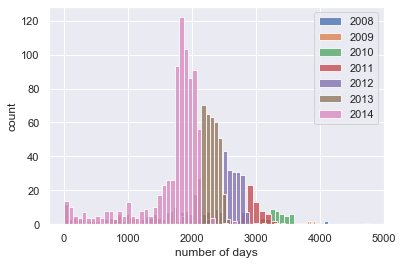

In [345]:
# See the distribution of number of days count in different years
plt.hist(dl_2008['now-last_commit'], bins = 50, alpha = 0.8, label = '2008');
plt.hist(dl_2009['now-last_commit'], bins = 50, alpha = 0.8, label = '2009');
plt.hist(dl_2010['now-last_commit'], bins = 50, alpha = 0.8, label = '2010');
plt.hist(dl_2011['now-last_commit'], bins = 50, alpha = 0.8, label = '2011');
plt.hist(dl_2012['now-last_commit'], bins = 50, alpha = 0.8, label = '2012');
plt.hist(dl_2013['now-last_commit'], bins = 50, alpha = 0.8, label = '2013');
plt.hist(dl_2014['now-last_commit'], bins = 50, alpha = 0.8, label = '2014');

plt.legend(loc = 'upper right')
plt.xlabel('number of days');
plt.ylabel('count');

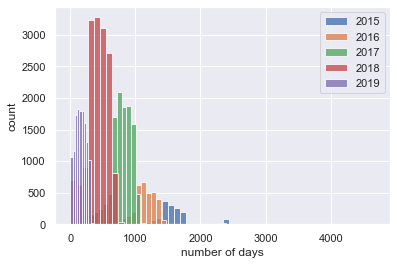

In [346]:
# See the distribution of number of days count in different years
plt.hist(dl_2015['now-last_commit'], bins = 50, alpha = 0.8, label = '2015');
plt.hist(dl_2016['now-last_commit'], bins = 50, alpha = 0.8, label = '2016');
plt.hist(dl_2017['now-last_commit'], bins = 50, alpha = 0.8, label = '2017');
plt.hist(dl_2018['now-last_commit'], bins = 50, alpha = 0.8, label = '2018');
plt.hist(dl_2019['now-last_commit'], bins = 50, alpha = 0.8, label = '2019');

plt.legend(loc = 'upper right')
plt.xlabel('number of days');
plt.ylabel('count');

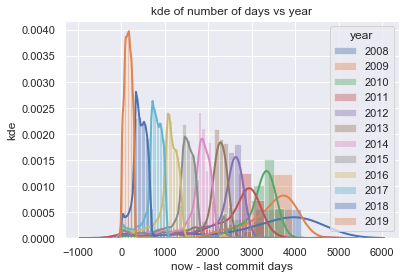

In [347]:
year_list = [dl_2008, dl_2009, dl_2010, dl_2011, dl_2012, dl_2013, dl_2014, dl_2015, dl_2016, dl_2017, dl_2018, dl_2019]
label = ['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']
for lab, year in zip(label, year_list):

    # Draw the density plot
    sns.distplot(year['now-last_commit'], hist = True, kde = True,
                 kde_kws = {'linewidth': 2}, 
                label = lab)
    
plt.legend(loc = 'upper right', title = 'year')
plt.title('kde of number of days vs year')
plt.xlabel('now - last commit days');
plt.ylabel('kde');

### <a name=medium></a>Medium distribution

In [348]:
year_list = [dl_2008, dl_2009, dl_2010, dl_2011, dl_2012, dl_2013, dl_2014, dl_2015, dl_2016, dl_2017, dl_2018, dl_2019]

year_list.reverse()
fork_med = [i.describe()['forks_count']['50%'] for i in year_list]
commit_med = [i.describe()['commits_count']['50%'] for i in year_list]
star_med = [i.describe()['stargazers_count']['50%'] for i in year_list]
sub_med = [i.describe()['subscribers_count']['50%'] for i in year_list]
issue_med = [i.describe()['open_issues_count']['50%'] for i in year_list]
branch_med = [i.describe()['branches_count']['50%'] for i in year_list]
release_med = [i.describe()['releases_count']['50%'] for i in year_list]
con_med = [i.describe()['contributors_count']['50%'] for i in year_list]
commit_freq75 = [i.describe()['commit_freq']['75%'] for i in year_list]
commit_freq50 = [i.describe()['commit_freq']['50%'] for i in year_list]
commit_freq25 = [i.describe()['commit_freq']['25%'] for i in year_list]


# create df 
year = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
sum_year = pd.DataFrame({'year':year, 
                         'commit_med':commit_med,
                        'fork_med':fork_med, 
                        'star_med':star_med, 
                        'sub_med':sub_med,
                        'issue_med':issue_med,
                        'branch_med':branch_med,
                        'release_med':release_med,
                        'con_med':con_med,
                        'commit_freq75':commit_freq25,
                        'commit_freq50':commit_freq50,
                        'commit_freq25':commit_freq75})
sum_year

,year,commit_med,fork_med,star_med,sub_med,issue_med,branch_med,release_med,con_med,commit_freq75,commit_freq50,commit_freq25
0,2008,6.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.333333,1.000000,2.444444
1,2009,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.429383,1.000000,4.500000
2,2010,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.500000,1.000000,5.000000
3,2011,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.500000,1.416667,8.100000
4,2012,7.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.500000,1.500000,14.062500
5,2013,8.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.500000,1.333333,11.551339
6,2014,9.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.500000,2.000000,13.125000
7,2015,10.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.571429,1.545455,15.008929
8,2016,14.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.000000,8.061607,32.307778
9,2017,8.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.619048,1.888889,22.464286


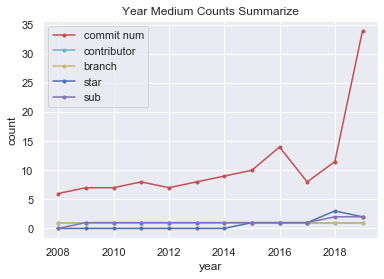

In [349]:
plt.plot(sum_year['year'],sum_year['commit_med'],'.r-', label = 'commit num')
plt.plot(sum_year['year'],sum_year['con_med'],'.c-', label = 'contributor')
plt.plot(sum_year['year'],sum_year['branch_med'],'.y-', label = 'branch')
plt.plot(sum_year['year'],sum_year['star_med'],'.b-', label = 'star')
plt.plot(sum_year['year'],sum_year['sub_med'],'.m-', label = 'sub')




plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Year Medium Counts Summarize')
plt.show()

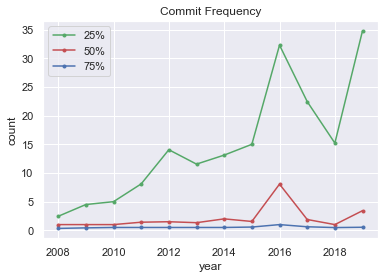

In [350]:
plt.plot(sum_year['year'],sum_year['commit_freq25'],'.g-', label = '25%')
plt.plot(sum_year['year'],sum_year['commit_freq50'],'.r-', label = '50%')
plt.plot(sum_year['year'],sum_year['commit_freq75'],'.b-', label = '75%')


plt.legend(loc='upper left')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Commit Frequency')
plt.show()

We can see that 2016 has the highest commit frequency, which is approximately the time of tensorflow release (Oct. 2015)

## <a name=language></a>Get programming language from selected data
1. Get commit frequency top 75% data

In [478]:
def select_df(percentage_str):
    
    year_list = [dl_2009, dl_2010, dl_2011, dl_2012, dl_2013, dl_2014, dl_2015, dl_2016, dl_2017, dl_2018, dl_2019]
    dl_select = dl_2008[dl_2008['commit_freq'] >= dl_2008.describe()['commit_freq'][percentage_str]]
    
    for year in year_list:
        dl_select = dl_select.append(year[year['commit_freq'] >= year.describe()['commit_freq'][percentage_str]])
        
        
    return dl_select
        


In [501]:
dl_select = select_df('50%')
# reset index
dl_select = dl_select.reset_index(drop=True)

In [502]:
dl_select.describe()

,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count,now-last_commit,active_day,commit_freq
count,25821.000000,25821.000000,25821.000000,25821.000000,25821.000000,25821.000000,25821.000000,25821.00000,25821.000000,25821.000000,25821.000000,25821.000000
mean,6.502885,19.477208,2.500058,0.536811,0.076411,22.141977,1.276093,0.10139,1.318191,524.171798,162.683668,15.652241
std,109.876660,320.120976,27.072645,7.074064,0.941023,49.181833,1.673722,1.16352,16.411460,473.714734,277.707605,57.719845
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000,0.000000,6.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.00000,1.000000,185.000000,11.000000,1.500000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,8.000000,1.000000,0.00000,1.000000,411.000000,56.000000,3.779661
75%,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000,0.00000,1.000000,736.000000,186.000000,11.200000
max,9377.000000,24363.000000,2434.000000,924.000000,84.000000,1242.000000,111.000000,70.00000,2626.000000,4763.000000,4029.000000,2460.000000


### Get programming language
- Get repo contains **Python, Jupyter Notebook, C, Shell, JavaScript, CSS, Java, Ruby, R, Cuda**

In [507]:
language_list = list(dl_select['language'])
language = str(language_list)
# remove symbols in string
import re
l = re.sub(r'[^\w]', ' ', language)

# calculate each language frequency count
from collections import Counter

# see top 10 frequent language
Counter(l.split()).most_common(30)

[('Python', 14987),
 ('Jupyter', 10909),
 ('Notebook', 10909),
 ('C', 4201),
 ('HTML', 4152),
 ('Shell', 3340),
 ('JavaScript', 2039),
 ('CSS', 1753),
 ('Makefile', 1133),
 ('Java', 1125),
 ('MATLAB', 748),
 ('Batchfile', 486),
 ('Dockerfile', 475),
 ('CMake', 463),
 ('TeX', 462),
 ('PHP', 431),
 ('Objective', 394),
 ('R', 391),
 ('Ruby', 348),
 ('Cuda', 316),
 ('Perl', 259),
 ('M', 236),
 ('Lua', 192),
 ('Go', 176),
 ('PowerShell', 129),
 ('Scala', 124),
 ('TypeScript', 121),
 ('Roff', 91),
 ('Swift', 89),
 ('D', 87)]

In [508]:
language = ['Python', 'Jupyter Notebook', 'C', 'Shell', 'JavaScript', 'CSS', 'Java', 'Ruby', 'R', 'Cuda']
dl_select['l_select'] = 0
for k in range(len(dl_select)):
    
    # if language is in the language list, assign 1 to the l_select
    if True in [i in language for i in dl_select['language'][k].split(',')]:
        dl_select['l_select'][k] = 1
    else:
        dl_select['l_select'][k] = -1
   
        

/Users/ellesmac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/ellesmac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [509]:
f"{sum(dl_select['l_select'] == 1)/ len(dl_select)} proportion repo use languages listed on our language_list"

'0.9204136168235157 proportion repo use languages listed on our language_list'

In [510]:
# select data that is in language list
dl_select = dl_select[dl_select['l_select'] == 1]

## <a name = compare></a>Compare selected data with orginial
### Compare dl_select with dl in each year's commit count

In [503]:
# get selected data based on created year
select_2008 = dl_select[dl_select['created_at'].dt.year == 2008]
select_2009 = dl_select[dl_select['created_at'].dt.year == 2009]
select_2010 = dl_select[dl_select['created_at'].dt.year == 2010]
select_2011 = dl_select[dl_select['created_at'].dt.year == 2011]
select_2012 = dl_select[dl_select['created_at'].dt.year == 2012]
select_2013 = dl_select[dl_select['created_at'].dt.year == 2013]
select_2014 = dl_select[dl_select['created_at'].dt.year == 2014]
select_2015 = dl_select[dl_select['created_at'].dt.year == 2015]
select_2016 = dl_select[dl_select['created_at'].dt.year == 2016]
select_2017 = dl_select[dl_select['created_at'].dt.year == 2017]
select_2018 = dl_select[dl_select['created_at'].dt.year == 2018]
select_2019 = dl_select[dl_select['created_at'].dt.year == 2019]



In [504]:
select_2019.describe()

,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count,now-last_commit,active_day,commit_freq
count,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.000000,6790.00000,6790.000000
mean,1.245655,4.279087,0.941973,0.188218,0.051252,13.500736,1.166568,0.045803,1.102062,149.298085,55.78218,6.493145
std,24.416587,81.005065,4.704388,2.139331,1.099831,20.675788,1.141009,0.440068,0.652253,98.648805,78.34583,18.682376
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,6.000000,1.00000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,79.000000,5.00000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,1.000000,144.000000,28.00000,2.400000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,1.000000,209.000000,78.00000,5.833333
max,1387.000000,4171.000000,200.000000,84.000000,84.000000,235.000000,73.000000,13.000000,14.000000,1733.000000,1564.00000,687.000000


In [505]:
dl_2019.describe()

,forks_count,stargazers_count,subscribers_count,open_issues_count,pulls_count,commits_count,branches_count,releases_count,contributors_count,now-last_commit,active_day,commit_freq
count,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000,13404.000000
mean,0.959117,3.198224,0.871232,0.153238,0.044315,28.122128,1.226649,0.037825,1.489033,163.180170,32.073336,3.478848
std,21.491942,70.053104,4.402387,1.743434,0.859341,357.126827,2.075847,0.394113,8.735433,90.078777,62.981891,13.643497
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,96.000000,1.000000,0.333333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,0.000000,1.000000,161.000000,4.000000,1.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,1.000000,0.000000,1.000000,227.000000,36.000000,2.444444
max,1387.000000,4171.000000,207.000000,84.000000,84.000000,17220.000000,129.000000,13.000000,396.000000,1733.000000,1564.000000,687.000000


/Users/ellesmac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


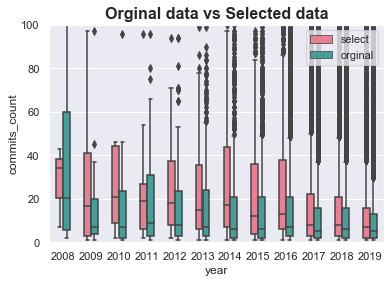

In [514]:
# add column of kind, year
dl_select_topic = dl_select
dl_select_topic['kind'] = 'select'
dl_select_topic['year'] = dl_select['created_at'].dt.year

dl_org_topic = dl_org
dl_org_topic['kind'] = 'orginal'
dl_org_topic['year'] = dl_org['created_at'].dt.year


box_data = pd.concat((dl_select_topic, dl_org_topic))

box_melt = box_data.loc[:,['kind', 'year', 'commits_count']];

ax = sns.boxplot(y='commits_count', x = 'year', 
                 hue = 'kind',
                 data= box_melt, 
                 width=0.5,
                 palette="husl");
ax.set(ylim = (0, 100));
ax.legend(loc = 'upper right');
ax.set_title('Orginal data vs Selected data', fontsize = 16, fontweight = 'bold');

Selection data has higher commits count in each percentile, however, the variance is higher

### <a name=analysis></a> Relationship between variables

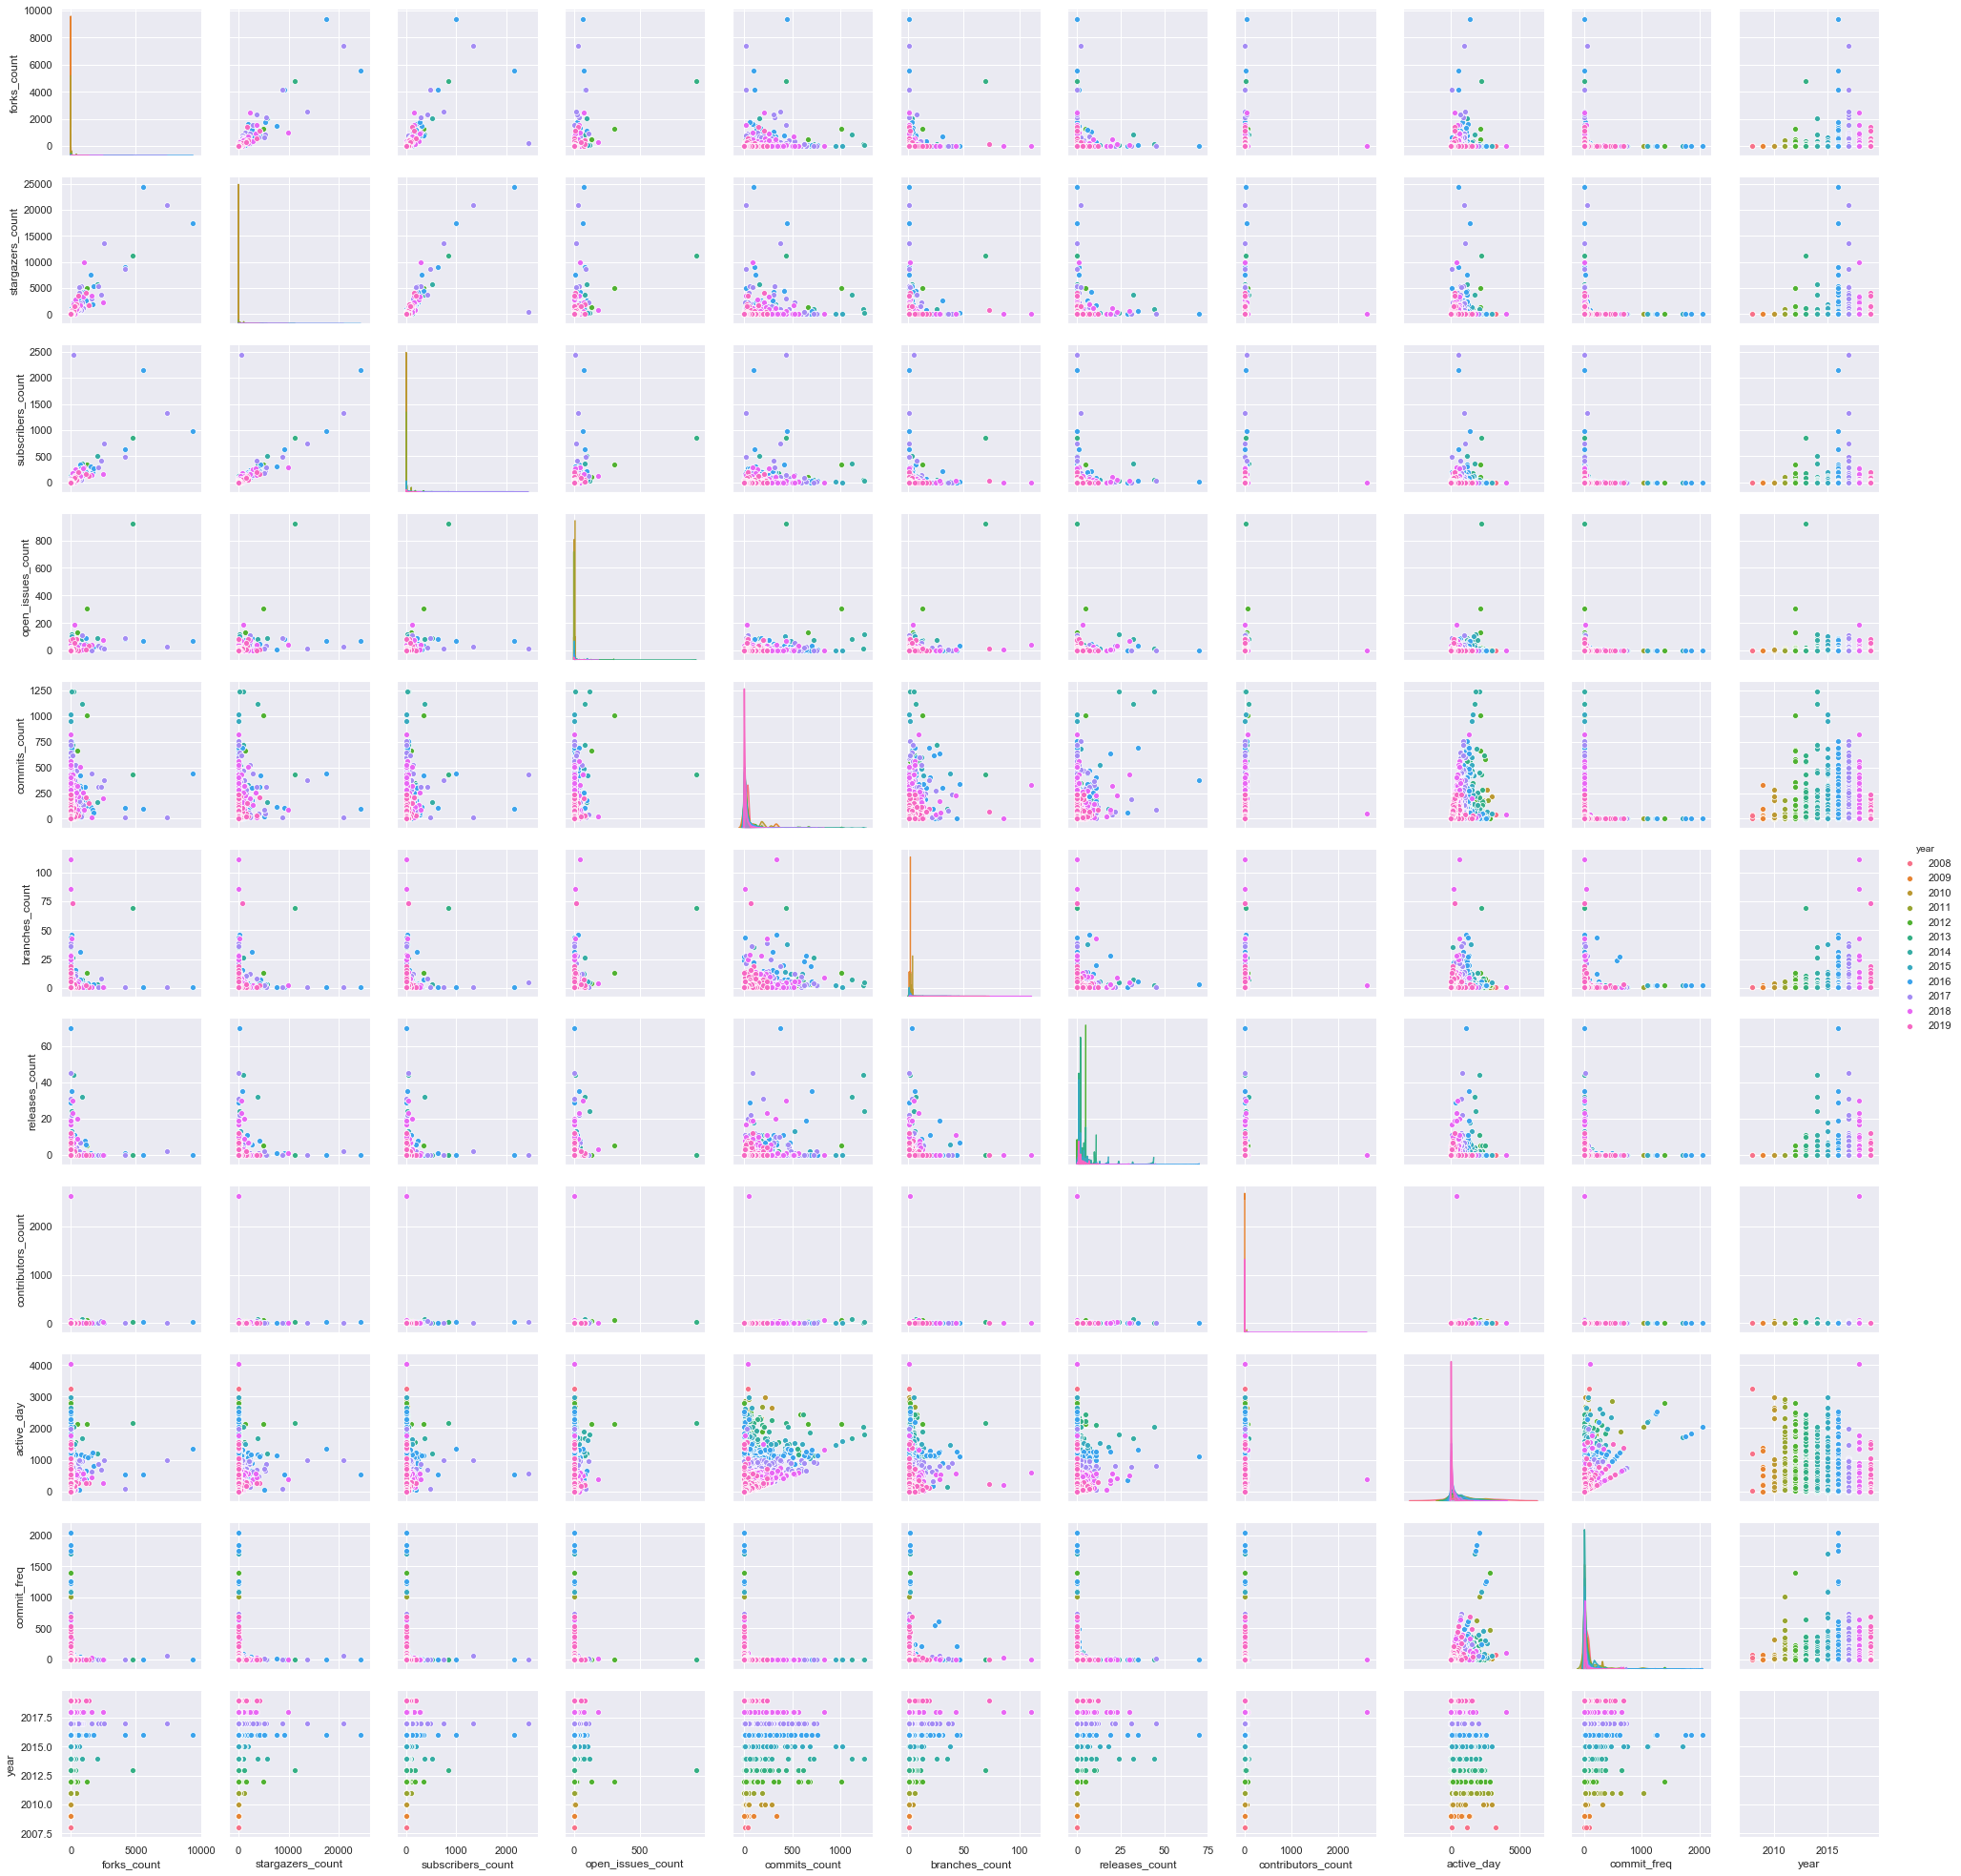

In [529]:
pair_data = dl_select.iloc[:,[4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 19, 20, 22]]
g = sns.pairplot(pair_data, hue="year")
